In [1]:
from PIL import Image
import requests as re
from io import BytesIO

In [2]:
res1 = re.get('https://picsum.photos/200/300')
img1 = Image.open(BytesIO(res1.content))
res2 = re.get('https://picsum.photos/300/300')
img2 = Image.open(BytesIO(res2.content))
res3 = re.get('https://picsum.photos/400/300')
img3 = Image.open(BytesIO(res3.content))
res4 = re.get('https://picsum.photos/200/250')
img4 = Image.open(BytesIO(res4.content))
res5 = re.get('https://picsum.photos/300/300')
img5 = Image.open(BytesIO(res5.content))

In [4]:
import matplotlib.pyplot as plt

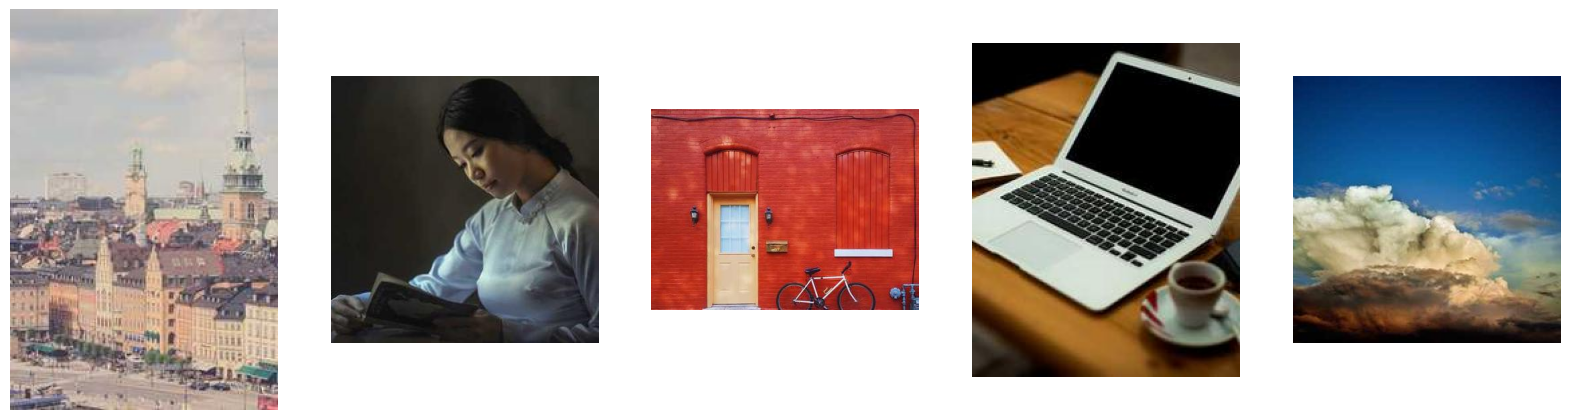

In [6]:
i = [img1,img2,img3,img4,img5]
fig,axes = plt.subplots(1,len(i), figsize=(20,6))

for x,y in zip(axes,i):
    x.imshow(y)
    x.axis('off')
    
plt.show()

### Scaling Images

In [7]:
img_resize1 = img1.resize((250, 350))
img_resize2 = img2.resize((250, 350))
img_resize3 = img3.resize((250, 350))
img_resize4 = img4.resize((250, 350))
img_resize5 = img5.resize((250, 350))


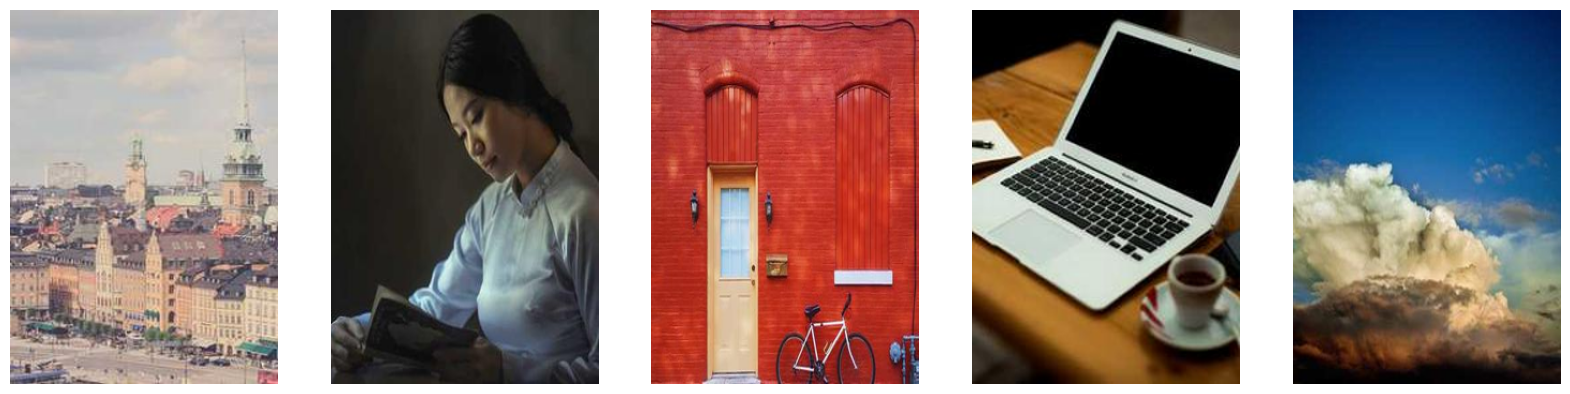

In [8]:
i = [img_resize1,img_resize2,img_resize3,img_resize4,img_resize5]
fig,axes = plt.subplots(1,len(i), figsize=(20,6))
for x,y in zip(axes,i):
    x.imshow(y)
    x.axis('off')
    
plt.show()

In [9]:
img_resize1.save('img_resize1.jpeg')
img_resize2.save('img_resize2.jpeg')
img_resize3.save('img_resize3.jpeg')
img_resize4.save('img_resize4.jpeg')
img_resize5.save('img_resize5.jpeg')

### Extract Boundary features and store into matrix

In [12]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 969.1 kB/s eta 0:00:00:010m00:02


In [13]:
import cv2
import numpy as np
from PIL import Image

In [15]:
def boundary_ft(img):
    A = []
    img_gray = img.convert("L")
    img_arr = np.array(img_gray)
    edge = cv2.Canny(img_arr, threshold1=250, threshold2=300)      
    A.append(edge)
    img_new = Image.fromarray(edge)
    return img_new, A

In [19]:
f1,m1 = boundary_ft(img_resize1)
f2,m2 = boundary_ft(img_resize2)
f3,m3 = boundary_ft(img_resize3)
f4,m4 = boundary_ft(img_resize4)
f5,m5 = boundary_ft(img_resize5)

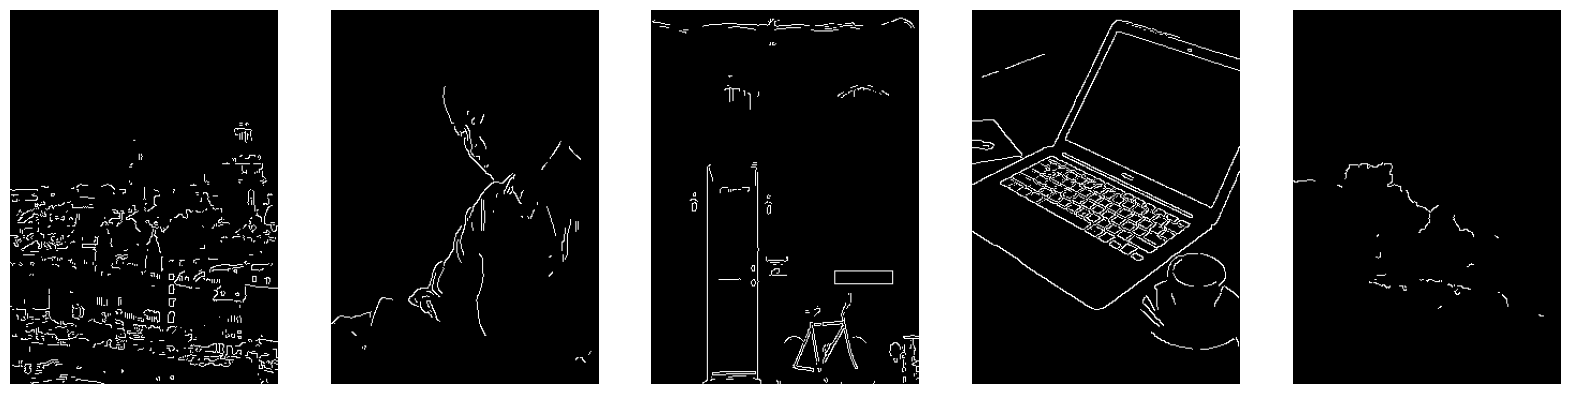

In [22]:
f = [f1,f2,f3,f4,f5]
fig, axes = plt.subplots(1,len(f),figsize=(20,6))
    
for x,y in zip(axes,f):
    x.imshow(y,cmap='gray')
    x.axis('off')
    
plt.show()

### Extract one region feature and store into matrix

In [23]:
def region_ft(img, region_box):
    img_rgb = img.convert("RGB")
    region = img_rgb.crop(region_box)
    region_array = np.array(region)
    flattened_region = region_array.reshape(-1, 3)
    intensity = np.mean(flattened_region, axis=1)
    region_feature = np.column_stack((flattened_region, intensity))
    return region, region_feature

# i = [img_resize1,img_resize2,img_resize3,img_resize4,img_resize5]

# image_paths = [resize1, resize2, resize3, resize4, resize5]
# new_size = (250, 250)
region_box = (0, 0, 100, 100)


region_feature1, rm1 = region_ft(img_resize1, region_box)
region_feature2, rm2 = region_ft(img_resize2, region_box)
region_feature3, rm3 = region_ft(img_resize3, region_box)
region_feature4, rm4 = region_ft(img_resize4, region_box)
region_feature5, rm5 = region_ft(img_resize5, region_box)


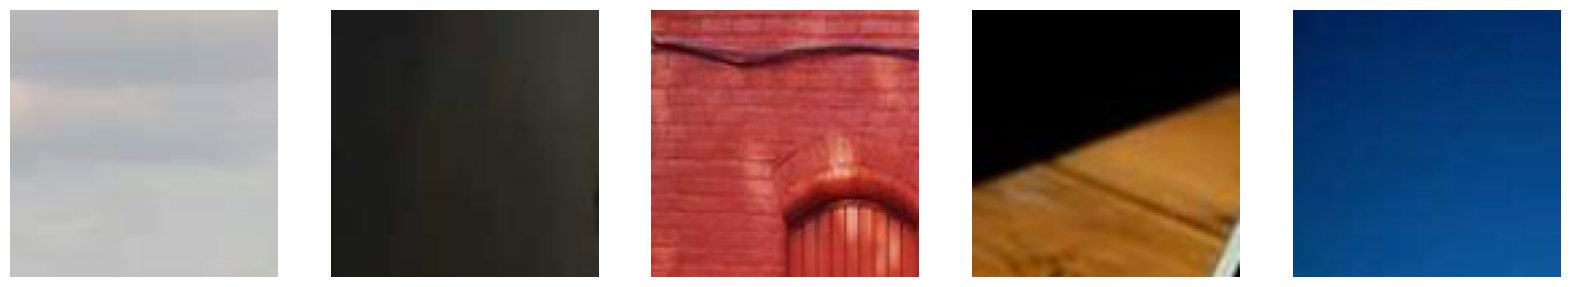

In [24]:
rf = [region_feature1,region_feature2,region_feature3,region_feature4,region_feature5]

fig, axes = plt.subplots(1, len(rf), figsize=(20, 5))
for x, y in zip(axes, rf):
    x.imshow(y, cmap='gray')
    x.axis('off')
plt.show()

In [31]:
rm = [rm1,rm2,rm3,rm4,rm5]

for i in rm:
    print(f"matrix")
    print(i,end="\n\n")
    

matrix
[[184.         184.         184.         184.        ]
 [184.         184.         184.         184.        ]
 [184.         184.         184.         184.        ]
 ...
 [193.         196.         191.         193.33333333]
 [192.         197.         191.         193.33333333]
 [192.         197.         191.         193.33333333]]

matrix
[[26.         26.         26.         26.        ]
 [26.         26.         26.         26.        ]
 [27.         27.         27.         27.        ]
 ...
 [49.         46.         41.         45.33333333]
 [49.         46.         41.         45.33333333]
 [49.         46.         41.         45.33333333]]

matrix
[[139.          39.          37.          71.66666667]
 [136.          36.          34.          68.66666667]
 [147.          47.          45.          79.66666667]
 ...
 [187.          54.          48.          96.33333333]
 [177.          48.          42.          89.        ]
 [167.          40.          33.          80.    